In [1]:
library(caret)
library(tidyverse)
library(cluster)
library(plotly)

#I decided to create my own dataset with 3 numerical variables
x11 = runif(100, 5.0, 7.5)
x12 = runif(100, 10, 15)
x13 = runif(100, 20, 23)
cl1 = cbind.data.frame(x11, x12, x13)

x21 = runif(70, 5, 6)
x22 = runif(70, 30, 40)
x23 = runif(70, 4, 12)
cl2 = cbind.data.frame(x21, x22, x23)

x31 = runif(90, 5, 31)
x32 = runif(90, 30, 100)
x33 = runif(90, 7, 22)
cl3 = cbind.data.frame(x31, x32, x33)

names(cl2) = names(cl1)
names(cl3) = names(cl2)

myData = rbind(cl1, cl2, cl3)
names(myData) = c('x1','x2','x3')

#We know by default it is 3 clusters. Let's see if we succeed in identifying that. Some overlap between clusters was created on purpose
#If we attempt to give labels, some will be wrong due to the overlap.

Warning message:
"package 'caret' was built under R version 3.4.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.3.4     v purrr   0.2.4
v tidyr   0.8.0     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.3.4     v forcats 0.2.0
Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
Warning message:
"package 'cluster' was bui

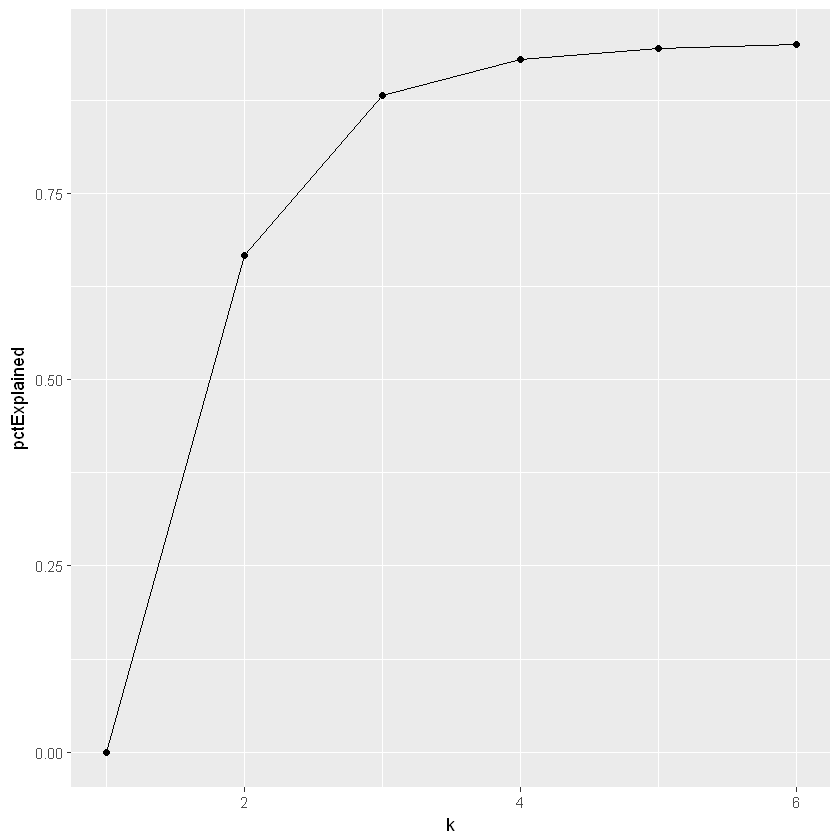

In [2]:

nClusters = 1:6
forMap <- list()
for(i in seq_along(nClusters)){
  forMap[[i]]<- kmeans(x = myData ,centers = nClusters[i],nstart = 20)
}

k = 1:6
pctExplained = map_dbl(forMap, ~.x$betweenss/.x$totss)
elbow = tibble(k = k, pct_explained = pctExplained)

ggplot(elbow, mapping = aes(x=k, y=pctExplained)) + geom_line() + geom_point()
#3 seems appropriate based on the elbow, as expected

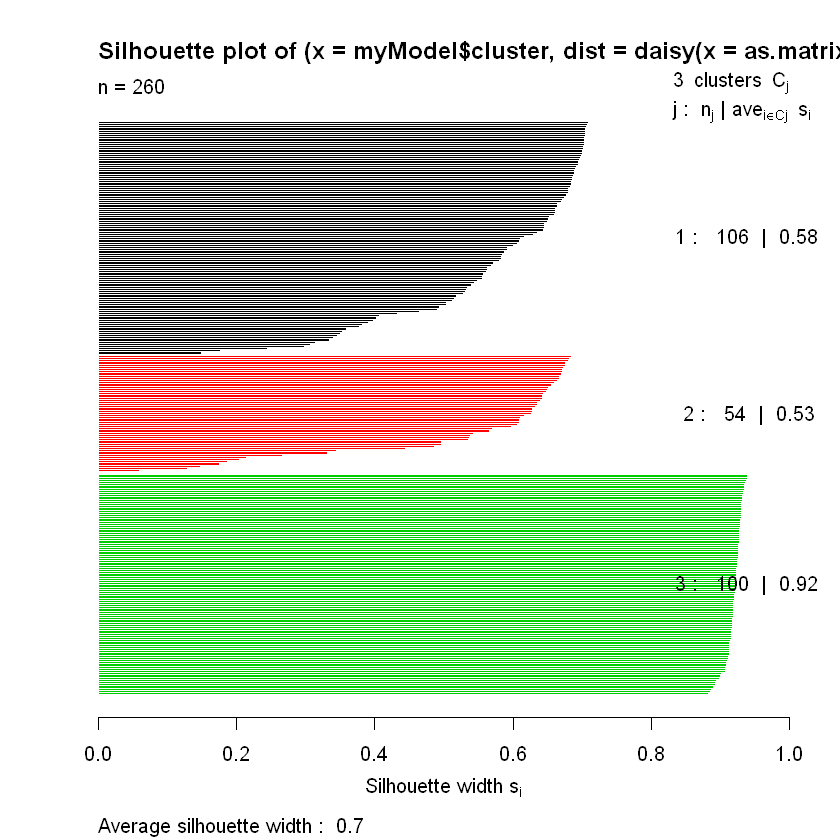

In [3]:
myModel = forMap[[3]]

mySil = silhouette(x = myModel$cluster, #cluster result
                          dist = daisy(x = as.matrix(myData),metric = "euclidean")) #distance matrix
plot(mySil,col=1:3)

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 1 1
[186] 2 2 2 1 2 2 2 1 2 2 1 2 2 2 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 2 2
[223] 2 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 2 2
[260] 1

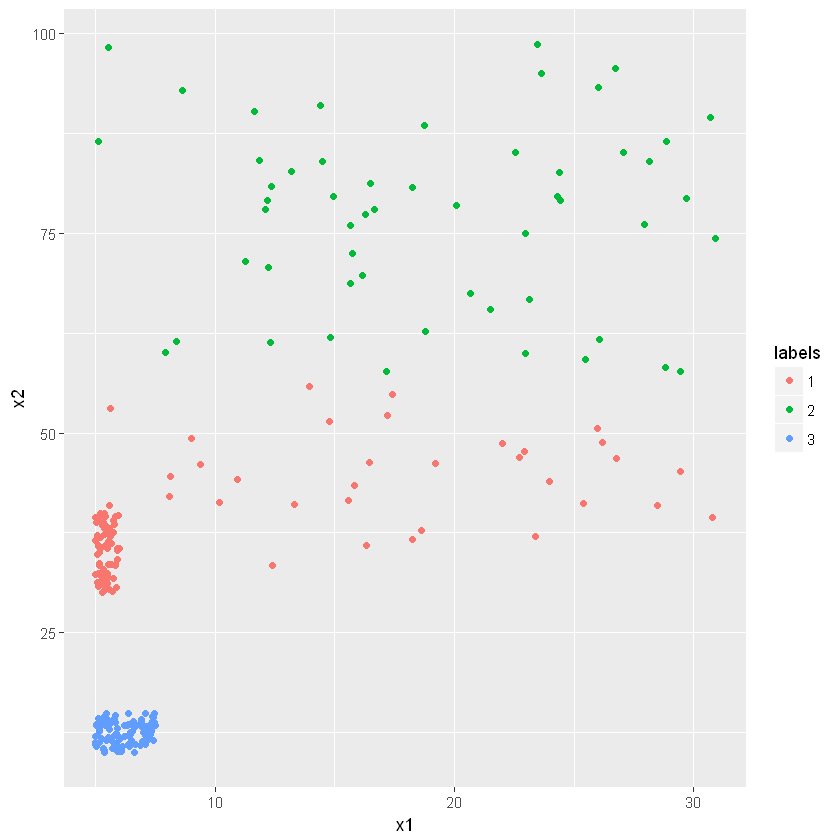

In [5]:
myModel$cluster #what I defined as  1 is the one tagged "2", 2--->"1", 3-->"3"
labels = as.factor(myModel$cluster)
myData = cbind(myData, labels)
names(myData)[4] = paste('labels')

p1 = ggplot(myData, aes(x=x1, y=x2, color=labels)) + geom_point() 
#Careful! this is a 2D plot, but in reality we need it to be 3D to be accurate.
#I need t
p1



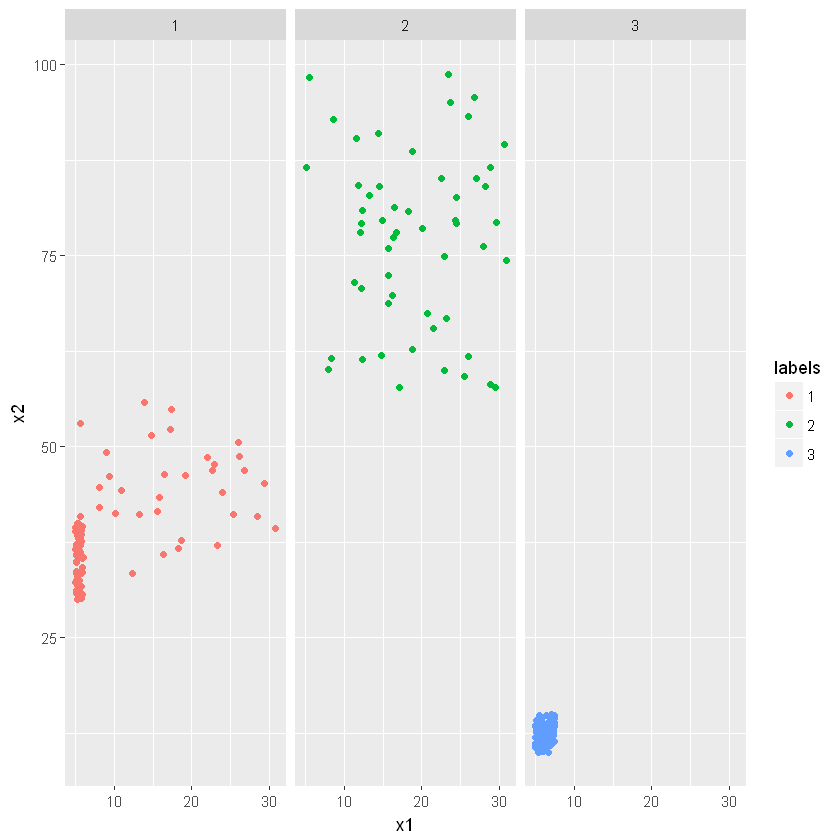

In [6]:
p1 + facet_wrap(~labels)

In [7]:
p3D = plot_ly(myData, x = ~x1, y = ~x2, z = ~x3, color = ~labels)
p3D
#from this plot, we can see that there are 2 distinct clusters, and then a lot of spread
#maybe in cases like this, euclidian distance is not ideal, as it groups some of the variables in the spread (green) with the ones in the greed that are grouped together
#to avoid that a different type of distance should probably be used

HTML widgets cannot be represented in plain text (need html)